In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import learning_curve

In [2]:
spam_df = pd.read_csv('spam.csv')

In [3]:
spam_df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
conv = {'spam':1, 'ham':0}

spam_df['spam'] = spam_df['Category'].map(lambda x: conv.get(x,x))

spam_df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


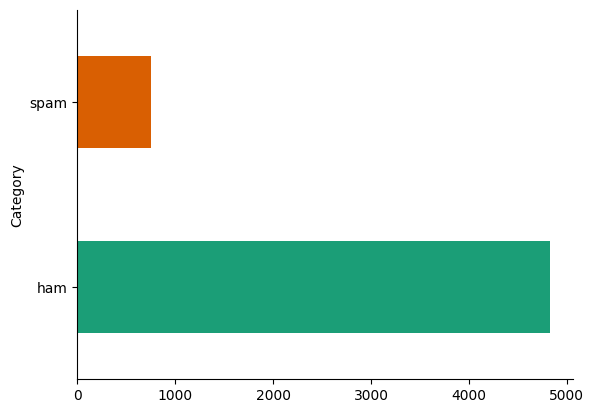

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
spam_df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.spam, test_size=0.25)

In [7]:
cv = CountVectorizer()

x_train_count = cv.fit_transform(x_train.values)

x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
nb = MultinomialNB()

nb.fit(x_train_count, y_train)

MultinomialNB()

In [9]:
x_test_count = cv.transform(x_test)

nb.score(x_test_count, y_test)

0.9834888729361091

In [10]:
from sklearn.svm import SVC

In [11]:
svm_model = SVC(kernel='linear', C=1.0)

In [12]:
svm_model.fit(x_train_count, y_train)

SVC(kernel='linear')

In [13]:
svm_model.score(x_test_count, y_test)

0.9863603732950467

In [14]:
from sklearn.linear_model import RidgeClassifier

In [15]:
clf = RidgeClassifier()

In [16]:
clf.fit(x_train_count, y_train)

RidgeClassifier()

In [17]:
clf.score(x_test_count, y_test)

0.9791816223977028

In [18]:
def plot_learning_curve(model, x_train, y_train, model_name):
  train_sizes, train_scores, val_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

  plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
  plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Accuracy')
  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.title(f'{model_name} Learning Curve')
  plt.legend()
  plt.show()

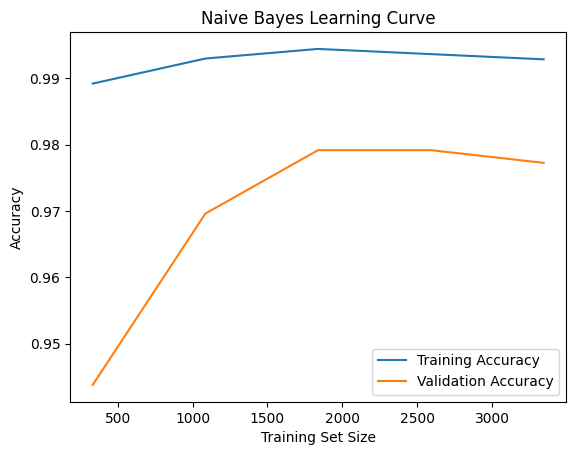

In [19]:
plot_learning_curve(nb, x_train_count,y_train ,'Naive Bayes')

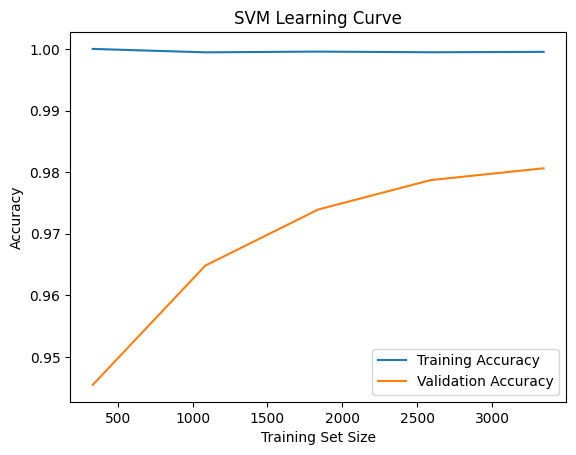

In [20]:
plot_learning_curve(svm_model, x_train_count,y_train ,'SVM')

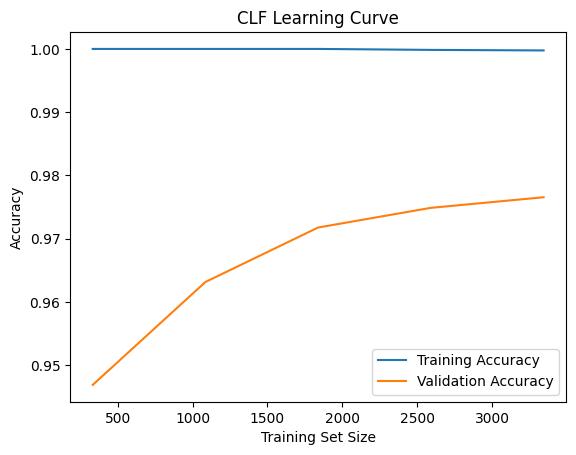

In [21]:
plot_learning_curve(clf, x_train_count,y_train ,'CLF')